In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/KT_ETRI/

/content/drive/MyDrive/KT_ETRI


In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchtext
import time
import seaborn as sns
import matplotlib.pyplot as plt
import math

import os
import random
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42) # Seed 고정

In [5]:
import pandas as pd
import numpy as np

In [6]:
q1_data = pd.read_csv('Q1_train.csv')
q1_test = pd.read_csv('Q1_test.csv', index_col = 0)
q1_data.head()

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,...,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
0,2023-05-19 00:00:00,BaseStationG,0,0.0,12,12,10,10,0,0,...,10.5,22.4,47.0,47.0,17.0,2243.0,-93.3,11.1,0,1
1,2023-05-19 00:00:00,BaseStationE,0,0.0,28,28,27,27,11,11,...,19.4,8.8,174.0,174.0,39.0,2240.0,-93.5,10.2,4,5
2,2023-05-19 00:00:00,BaseStationF,1,3.7,27,27,17,17,8,8,...,15.5,6.0,137.0,137.0,53.0,1337.0,-92.7,11.3,2,6
3,2023-05-19 00:00:00,BaseStationI,0,0.0,1,1,1,1,0,0,...,8.5,5.7,259.0,259.0,5.0,1401.0,-92.8,13.6,0,1
4,2023-05-19 00:00:00,BaseStationD,0,0.0,29,29,29,29,1,1,...,18.3,9.2,51.0,51.0,35.0,2083.0,-92.7,12.4,28,4


In [7]:
q1_test.head()

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,...,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb
0,2023-05-19 00:00:00,BaseStationJ,0,0.0,5,5,5,5,0,0,...,412.0,13.3,22.4,73.0,73.0,7.0,1401.0,-93.0,9.8,0
1,2023-05-19 00:00:00,BaseStationB,0,0.0,3,3,3,3,0,0,...,1.0,0.0,0.0,5.0,5.0,4.0,2083.0,-92.8,5.9,4
2,2023-05-19 00:05:00,BaseStationJ,0,0.0,3,3,2,2,0,0,...,418.0,45.6,5.2,33.0,33.0,14.0,1312.0,-93.1,11.7,0
3,2023-05-19 00:05:00,BaseStationB,0,0.0,16,16,16,16,0,0,...,680.0,12.6,0.7,19.0,19.0,16.0,1936.0,-92.8,7.4,14
4,2023-05-19 00:10:00,BaseStationJ,0,0.0,4,4,4,4,0,0,...,184.0,12.9,2.8,52.0,52.0,6.0,1217.0,-93.1,11.1,0


In [8]:
q1_data.dtypes

datetime                               object
ru_id                                  object
scgfail                                 int64
scgfailratio                          float64
erabaddatt                              int64
erabaddsucc                             int64
endcaddatt                              int64
endcaddsucc                             int64
endcmodbymenbatt                        int64
endcmodbymenbsucc                       int64
endcmodbysgnbatt                        int64
endcmodbysgnbsucc                       int64
connestabatt                            int64
connestabsucc                           int64
redirectiontolte_coverageout            int64
redirectiontolte_epsfallback            int64
redirectiontolte_emergencyfallback      int64
handoveratt                             int64
handoversucc                            int64
reestabatt                              int64
reestabsucc                             int64
rlculbyte                         

In [9]:
q1_test.dtypes

datetime                               object
ru_id                                  object
scgfail                                 int64
scgfailratio                          float64
erabaddatt                              int64
erabaddsucc                             int64
endcaddatt                              int64
endcaddsucc                             int64
endcmodbymenbatt                        int64
endcmodbymenbsucc                       int64
endcmodbysgnbatt                        int64
endcmodbysgnbsucc                       int64
connestabatt                            int64
connestabsucc                           int64
redirectiontolte_coverageout            int64
redirectiontolte_epsfallback            int64
redirectiontolte_emergencyfallback      int64
handoveratt                             int64
handoversucc                            int64
reestabatt                              int64
reestabsucc                             int64
rlculbyte                         

#### dtype 맞게 전처리

datetime : object &rightarrow; datetime

In [10]:
q1_data['datetime'] = pd.to_datetime(q1_data['datetime'])
q1_test['datetime'] = pd.to_datetime(q1_test['datetime'])

#### ratio 변수 통일 + 변수 drop

연결 성공한 횟수 &rightarrow; 연결 성공 백분율로 변경

In [11]:
# 연결 성공한 횟수 -> 연결 성공 백분율로 변경
q1_data['erabaddratio'] = (q1_data['erabaddsucc'] / q1_data['erabaddatt']) * 100
q1_data['endcaddratio'] = (q1_data['endcaddsucc'] / q1_data['endcaddatt']) * 100
q1_data['endcmodbymenbratio'] = (q1_data['endcmodbymenbsucc'] / q1_data['endcmodbymenbatt']) * 100
q1_data['endcmodbysgnbratio'] = (q1_data['endcmodbysgnbsucc'] / q1_data['endcmodbysgnbatt']) * 100
q1_data['connestabratio'] = (q1_data['connestabsucc'] / q1_data['connestabatt']) * 100
q1_data['handoverratio'] = (q1_data['handoversucc'] / q1_data['handoveratt']) * 100
q1_data['reestabratio'] = (q1_data['reestabsucc'] / q1_data['reestabatt']) * 100

In [12]:
# 연결 성공한 횟수 -> 연결 성공 백분율로 변경
q1_test['erabaddratio'] = (q1_test['erabaddsucc'] / q1_test['erabaddatt']) * 100
q1_test['endcaddratio'] = (q1_test['endcaddsucc'] / q1_test['endcaddatt']) * 100
q1_test['endcmodbymenbratio'] = (q1_test['endcmodbymenbsucc'] / q1_test['endcmodbymenbatt']) * 100
q1_test['endcmodbysgnbratio'] = (q1_test['endcmodbysgnbsucc'] / q1_test['endcmodbysgnbatt']) * 100
q1_test['connestabratio'] = (q1_test['connestabsucc'] / q1_test['connestabatt']) * 100
q1_test['handoverratio'] = (q1_test['handoversucc'] / q1_test['handoveratt']) * 100
q1_test['reestabratio'] = (q1_test['reestabsucc'] / q1_test['reestabatt']) * 100

In [13]:
# 연결 시도한 횟수가 0이어서 성공 백분율이 nan이 된 값들을 0으로 바꿔주기
ratios = ['erabaddratio', 'endcaddratio', 'endcmodbymenbratio', 'endcmodbysgnbratio', 'connestabratio', 'handoverratio', 'reestabratio']
for i in ratios :
  q1_data[i] = q1_data[i].replace(np.nan, 0)

In [14]:
# 연결 시도한 횟수가 0이어서 성공 백분율이 nan이 된 값들을 0으로 바꿔주기
for i in ratios :
  q1_test[i] = q1_test[i].replace(np.nan, 0)

In [15]:
list = ['erabaddsucc', 'endcaddsucc', 'endcmodbymenbsucc', 'endcmodbysgnbsucc', 'connestabsucc', 'handoversucc', 'reestabsucc']
q1_data = q1_data.drop(list, axis = 1)

In [16]:
q1_test = q1_test.drop(list, axis = 1)

In [17]:
# 순서 재배치 + scgfail, redirectiontolte_emergencyfallback, numrar drop
col = q1_data.columns.to_numpy()
col = col[[0,1,3,4,32,5,33,6,34,7,35,8,36,9,10,12,37,13,38,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31]]
q1_data = q1_data[col]
q1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137445 entries, 0 to 137444
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   datetime                      137445 non-null  datetime64[ns]
 1   ru_id                         137445 non-null  object        
 2   scgfailratio                  137445 non-null  float64       
 3   erabaddatt                    137445 non-null  int64         
 4   erabaddratio                  137445 non-null  float64       
 5   endcaddatt                    137445 non-null  int64         
 6   endcaddratio                  137445 non-null  float64       
 7   endcmodbymenbatt              137445 non-null  int64         
 8   endcmodbymenbratio            137445 non-null  float64       
 9   endcmodbysgnbatt              137445 non-null  int64         
 10  endcmodbysgnbratio            137445 non-null  float64       
 11  connestabatt 

In [18]:
col = q1_test.columns.to_numpy()
col = col[[0,1,3,4,31,5,32,6,33,7,34,8,35,9,10,12,36,13,37,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30]]
q1_test = q1_test[col]
q1_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34362 entries, 0 to 34361
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   datetime                      34362 non-null  datetime64[ns]
 1   ru_id                         34362 non-null  object        
 2   scgfailratio                  34362 non-null  float64       
 3   erabaddatt                    34362 non-null  int64         
 4   erabaddratio                  34362 non-null  float64       
 5   endcaddatt                    34362 non-null  int64         
 6   endcaddratio                  34362 non-null  float64       
 7   endcmodbymenbatt              34362 non-null  int64         
 8   endcmodbymenbratio            34362 non-null  float64       
 9   endcmodbysgnbatt              34362 non-null  int64         
 10  endcmodbysgnbratio            34362 non-null  float64       
 11  connestabatt                

#### 결측치

test 데이터에는 결측치 없음

In [19]:
q1_data.isna().sum()

datetime                        0
ru_id                           0
scgfailratio                    0
erabaddatt                      0
erabaddratio                    0
endcaddatt                      0
endcaddratio                    0
endcmodbymenbatt                0
endcmodbymenbratio              0
endcmodbysgnbatt                0
endcmodbysgnbratio              0
connestabatt                    0
connestabratio                  0
redirectiontolte_coverageout    0
redirectiontolte_epsfallback    0
handoveratt                     0
handoverratio                   0
reestabatt                      0
reestabratio                    0
rlculbyte                       9
rlcdlbyte                       9
totprbulavg                     9
totprbdlavg                     9
dlreceivedriavg                 9
dltransmittedmcsavg             9
airmaculbyte                    9
airmacdlbyte                    9
bler_ul                         9
bler_dl                         9
rachpreamblea 

**선형 보간법**

In [20]:
# 결측치 전후의 패턴이 변화하는 구간인 경우에는
# 직전값, 직후값, 평균/중앙값 같은 방식으로 처리할 경우 문제가 발생
# 선형 보간법 사용해보겠음!

In [21]:
from scipy import interpolate

In [22]:
q1_data['rlculbyte'] = q1_data['rlculbyte'].interpolate(method='linear')
q1_data['rlcdlbyte'] = q1_data['rlcdlbyte'].interpolate(method='linear')
q1_data['totprbulavg'] = q1_data['totprbulavg'].interpolate(method='linear')
q1_data['totprbdlavg'] = q1_data['totprbdlavg'].interpolate(method='linear')
q1_data['dlreceivedriavg'] = q1_data['dlreceivedriavg'].interpolate(method='linear')
q1_data['dltransmittedmcsavg'] = q1_data['dltransmittedmcsavg'].interpolate(method='linear')
q1_data['airmaculbyte'] = q1_data['airmaculbyte'].interpolate(method='linear')
q1_data['airmacdlbyte'] = q1_data['airmacdlbyte'].interpolate(method='linear')
q1_data['bler_ul'] = q1_data['bler_ul'].interpolate(method='linear')
q1_data['bler_dl'] = q1_data['bler_dl'].interpolate(method='linear')
q1_data['rachpreamblea'] = q1_data['rachpreamblea'].interpolate(method='linear')
q1_data['nummsg3'] = q1_data['nummsg3'].interpolate(method='linear')
q1_data['attpaging'] = q1_data['attpaging'].interpolate(method='linear')
q1_data['rssipathavg'] = q1_data['rssipathavg'].interpolate(method='linear')
q1_data['dlreceivedcqiavg'] = q1_data['dlreceivedcqiavg'].interpolate(method='linear')

In [23]:
#B,J와 유사한 기지국을 찾기 위해서 데이터 합침
q1_data_a=q1_data.iloc[:,:-1]
q1_all = pd.concat([q1_data_a,q1_test])

In [24]:
q1_all.tail()

,datetime,ru_id,scgfailratio,erabaddatt,erabaddratio,endcaddatt,endcaddratio,endcmodbymenbatt,endcmodbymenbratio,endcmodbysgnbatt,...,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb
34357,2023-07-17 15:40:00,BaseStationB,6.7,15,100.0,14,100.0,2,100.0,16,...,120.0,820.0,20.1,3.4,21.0,18.0,8687.0,-92.4,7.1,13
34358,2023-07-17 15:45:00,BaseStationJ,0.0,7,100.0,7,100.0,0,0.0,1,...,43.0,389.0,23.4,3.5,98.0,7.0,5441.0,-92.7,11.0,0
34359,2023-07-17 15:45:00,BaseStationB,0.0,17,100.0,15,100.0,3,100.0,26,...,122.0,26171.0,15.8,14.9,21.0,18.0,8706.0,-91.7,7.0,14
34360,2023-07-17 15:50:00,BaseStationJ,0.0,13,100.0,12,100.0,0,0.0,6,...,67.0,53.0,17.1,4.6,56.0,15.0,5751.0,-92.6,11.3,0
34361,2023-07-17 15:50:00,BaseStationB,0.0,21,100.0,21,100.0,1,100.0,23,...,78.0,22267.0,5.7,8.8,37.0,26.0,9040.0,-92.2,7.6,22


In [25]:
#int 타입 -> float 타입으로 바꿔주기
indx=[3,5,7,9,11,13,14,15,17,34]

for i in indx:
  q1_data.iloc[:, i]=q1_data.iloc[:, i].astype(float)

for i in indx:
  q1_test.iloc[:, i]=q1_test.iloc[:, i].astype(float)

q1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137445 entries, 0 to 137444
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   datetime                      137445 non-null  datetime64[ns]
 1   ru_id                         137445 non-null  object        
 2   scgfailratio                  137445 non-null  float64       
 3   erabaddatt                    137445 non-null  float64       
 4   erabaddratio                  137445 non-null  float64       
 5   endcaddatt                    137445 non-null  float64       
 6   endcaddratio                  137445 non-null  float64       
 7   endcmodbymenbatt              137445 non-null  float64       
 8   endcmodbymenbratio            137445 non-null  float64       
 9   endcmodbysgnbatt              137445 non-null  float64       
 10  endcmodbysgnbratio            137445 non-null  float64       
 11  connestabatt 

<ipython-input-25-0301b5bf7aab>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  q1_data.iloc[:, i]=q1_data.iloc[:, i].astype(float)
<ipython-input-25-0301b5bf7aab>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  q1_test.iloc[:, i]=q1_test.iloc[:, i].astype(float)


# **시계열 모델링**

# **데이터 분리**

In [82]:
Q1_B=q1_test[q1_test['ru_id']=='BaseStationB']
Q1_C=q1_data[q1_data['ru_id']=='BaseStationC']
Q1_D=q1_data[q1_data['ru_id']=='BaseStationD']
Q1_J=q1_test[q1_test['ru_id']=='BaseStationJ']

# **StationC**

In [83]:
Q1_C['datetime'] = pd.to_datetime(Q1_C['datetime'])
Q1_C.set_index('datetime', inplace=True)

# 훈련과 레이블 분리
Q1_C = Q1_C.drop('ru_id', axis=1)
X=Q1_C.iloc[:,:-1]
y=Q1_C.iloc[:, [-1]]
print(X)
print(y)

                     scgfailratio  erabaddatt  erabaddratio  endcaddatt  \
datetime                                                                  
2023-05-19 00:00:00           0.0        13.0         100.0         9.0   
2023-05-19 00:05:00           7.7        13.0         100.0        12.0   
2023-05-19 00:10:00           0.0        20.0         100.0        17.0   
2023-05-19 00:15:00           0.0        11.0         100.0         8.0   
2023-05-19 00:20:00           0.0         4.0         100.0         4.0   
...                           ...         ...           ...         ...   
2023-07-17 15:30:00           0.0        14.0         100.0        13.0   
2023-07-17 15:35:00           0.0        18.0         100.0        16.0   
2023-07-17 15:40:00           0.0        17.0         100.0        15.0   
2023-07-17 15:45:00           0.0        10.0         100.0         8.0   
2023-07-17 15:50:00           0.0        22.0         100.0        19.0   

                     end

<ipython-input-83-4d5c76330e37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_C['datetime'] = pd.to_datetime(Q1_C['datetime'])


In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

# **데이터 스케일링 및 텐서 변환**

In [84]:
# 데이터 분포 조정
C_scale_x=StandardScaler()
#C_scale_y = StandardScaler()
C_scale_y = MinMaxScaler()
C_scale_x.fit(X)
C_scale_y.fit(y)

X_ss = C_scale_x.transform(X)
y_ms = C_scale_y.transform(y)

train_size = int(len(Q1_C)*0.8)
X_train = X_ss[:train_size, :]
X_test = X_ss[train_size:, :]

y_train = y_ms[:train_size, :]
y_test = y_ms[train_size:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

# 데이터셋 형태 및 크기 조정

#Variable로 감싸진 텐서는 .backward()가 호출될 때 자동으로 기울기가 계산
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

#-----------------------------------------------------
#torch.reshape: 텐서의 형태를 바꿀 때 사용 (200,5)->(200,1,5)

Training Shape (13744, 33) (13744, 1)
Testing Shape (3437, 33) (3437, 1)
Training Shape torch.Size([13744, 1, 33]) torch.Size([13744, 1])
Testing Shape torch.Size([3437, 1, 33]) torch.Size([3437, 1])


# **LSTM 함수 정의**

In [85]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes  # 클래스 개수
        self.num_layers = num_layers    # LSTM 계층의 개수
        self.input_size = input_size    # 입력 크기로 훈련 데이터셋의 칼럼 개수 의미
        self.hidden_size = hidden_size  # 은닉층의 뉴런 개수
        self.seq_length = seq_length    # 시퀀스 길이

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) # LSTM 계층
        self.fc_1 =  nn.Linear(hidden_size, 128)                   # 완전연결층

        self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(0.2) #드롭아웃

        self.fc = nn.Linear(128, num_classes)                      # 출력층

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #은닉 상태를 0으로 초기화
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #셀 상태를 0으로 초기화

        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #LSTM 계층에 은닉, 셀 상태 적용
        hn = hn.view(-1, self.hidden_size)        #완전연결층 적용을 위해 데이터의 형태 조정(1차원으로 조정)
        out = self.relu(hn)
        out = self.fc_1(out)
        #out = self.dropout(out)
        out = self.relu(out)
        out = self.fc(out) #출력층
        return out

# **파라미터 및 손실함수 지정**

In [86]:
num_epochs = 2000
learning_rate = 0.01

input_size = 33
hidden_size = 10
num_layers = 1

num_classes = 1
model_C = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model_C.parameters(), lr=learning_rate)

In [87]:
for epoch in range(num_epochs):
    outputs = model_C.forward(X_train_tensors_f)
    optimizer.zero_grad()
    #y_train_tensors=y_train_tensors.repeat(2,1)
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.24275
Epoch: 100, loss: 0.05253
Epoch: 200, loss: 0.04952
Epoch: 300, loss: 0.04848
Epoch: 400, loss: 0.04771
Epoch: 500, loss: 0.04699
Epoch: 600, loss: 0.04702
Epoch: 700, loss: 0.04648
Epoch: 800, loss: 0.04575
Epoch: 900, loss: 0.04607
Epoch: 1000, loss: 0.04522
Epoch: 1100, loss: 0.04531
Epoch: 1200, loss: 0.04488
Epoch: 1300, loss: 0.04465
Epoch: 1400, loss: 0.04501
Epoch: 1500, loss: 0.04542
Epoch: 1600, loss: 0.04513
Epoch: 1700, loss: 0.04528
Epoch: 1800, loss: 0.04529
Epoch: 1900, loss: 0.04396


# **모델 예측**

MAE SCORE :  0.71803415


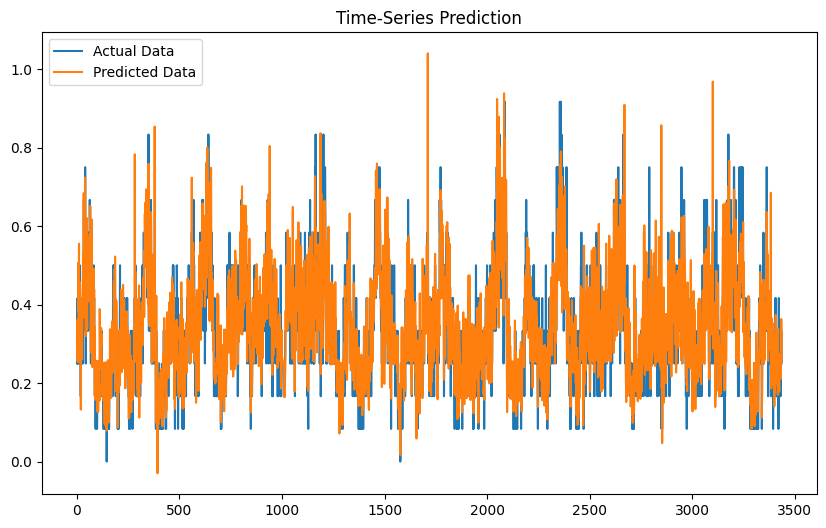

In [88]:
# 모델 예측 결과 출력
train_predict = model_C(X_test_tensors_f)
predicted = train_predict.data.numpy()
label_y = y_test_tensors.data.numpy()

predicted_inverse= C_scale_y.inverse_transform(predicted) # 정규화 해제, 그래프 본래값 출력위함
label_y_inverse = C_scale_y.inverse_transform(label_y)
plt.figure(figsize=(10,6))

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(label_y_inverse, predicted_inverse))

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

# **StationD**

In [36]:
Q1_D['datetime'] = pd.to_datetime(Q1_D['datetime'])
Q1_D.set_index('datetime', inplace=True)

# 훈련과 레이블 분리
Q1_D = Q1_D.drop('ru_id', axis=1)
X=Q1_D.iloc[:,:-1]
y=Q1_D.iloc[:, [-1]]
print(X)
print(y)

                     scgfailratio  erabaddatt  erabaddratio  endcaddatt  \
datetime                                                                  
2023-05-19 00:00:00           0.0        29.0         100.0        29.0   
2023-05-19 00:05:00           0.0        26.0         100.0        25.0   
2023-05-19 00:10:00           0.0        17.0         100.0        16.0   
2023-05-19 00:15:00           0.0        21.0         100.0        20.0   
2023-05-19 00:20:00           0.0        24.0         100.0        23.0   
...                           ...         ...           ...         ...   
2023-07-17 15:30:00           7.1        28.0         100.0        20.0   
2023-07-17 15:35:00           3.2        31.0         100.0        25.0   
2023-07-17 15:40:00           4.3        23.0         100.0        19.0   
2023-07-17 15:45:00           5.9        17.0         100.0        14.0   
2023-07-17 15:50:00           5.6        18.0         100.0        12.0   

                     end

<ipython-input-36-24530ac6ce01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_D['datetime'] = pd.to_datetime(Q1_D['datetime'])


# **데이터 스케일링 및 텐서 변환**

In [37]:
# 데이터 분포 조정
D_scale_x=StandardScaler()
#C_scale_y = StandardScaler()
D_scale_y = MinMaxScaler()
D_scale_x.fit(X)
D_scale_y.fit(y)

X_ss = D_scale_x.transform(X)
y_ms = D_scale_y.transform(y)

train_size = int(len(Q1_D)*0.8)
X_train = X_ss[:train_size, :]
X_test = X_ss[train_size:, :]

y_train = y_ms[:train_size, :]
y_test = y_ms[train_size:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

# 데이터셋 형태 및 크기 조정

#Variable로 감싸진 텐서는 .backward()가 호출될 때 자동으로 기울기가 계산
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

#-----------------------------------------------------
#torch.reshape: 텐서의 형태를 바꿀 때 사용 (200,5)->(200,1,5)

Training Shape (13744, 33) (13744, 1)
Testing Shape (3437, 33) (3437, 1)
Training Shape torch.Size([13744, 1, 33]) torch.Size([13744, 1])
Testing Shape torch.Size([3437, 1, 33]) torch.Size([3437, 1])


# **파라미터 및 손실함수 지정**

In [38]:
num_epochs = 2000
learning_rate = 0.01

input_size = 33
hidden_size = 10
num_layers = 1

num_classes = 1
model_D = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model_D.parameters(), lr=learning_rate)

In [39]:
for epoch in range(num_epochs):
    outputs = model_D.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.23804
Epoch: 100, loss: 0.05454
Epoch: 200, loss: 0.05148
Epoch: 300, loss: 0.05032
Epoch: 400, loss: 0.05355
Epoch: 500, loss: 0.04868
Epoch: 600, loss: 0.04887
Epoch: 700, loss: 0.04847
Epoch: 800, loss: 0.04792
Epoch: 900, loss: 0.05311
Epoch: 1000, loss: 0.04723
Epoch: 1100, loss: 0.04668
Epoch: 1200, loss: 0.04664
Epoch: 1300, loss: 0.04888
Epoch: 1400, loss: 0.04695
Epoch: 1500, loss: 0.04747
Epoch: 1600, loss: 0.04498
Epoch: 1700, loss: 0.04484
Epoch: 1800, loss: 0.04618
Epoch: 1900, loss: 0.04482


# **모델 예측**

MAE SCORE :  0.62926084


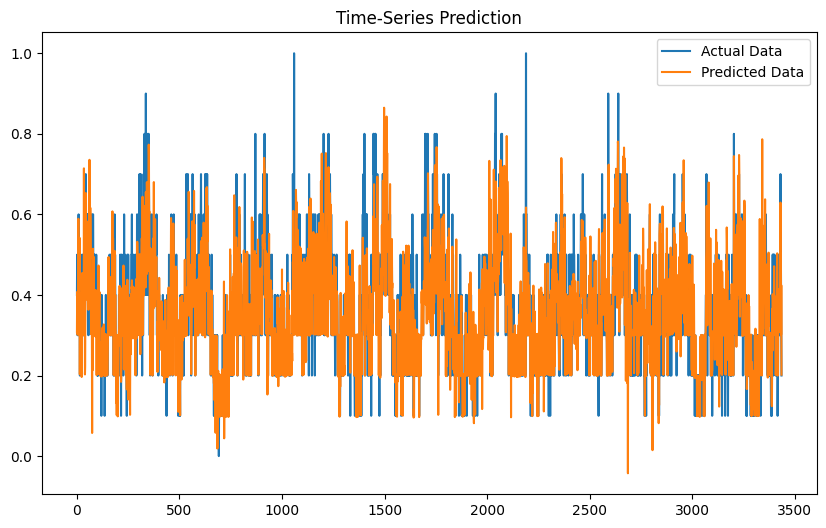

In [40]:
# 모델 예측 결과 출력
train_predict = model_D(X_test_tensors_f)
predicted = train_predict.data.numpy()
label_y = y_test_tensors.data.numpy()

predicted_inverse= D_scale_y.inverse_transform(predicted) # 정규화 해제, 그래프 본래값 출력위함
label_y_inverse = D_scale_y.inverse_transform(label_y)
plt.figure(figsize=(10,6))

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(label_y_inverse,predicted_inverse))

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

# **StationB**

##### C 모델로 예측

In [41]:
Q1_B['datetime'] = pd.to_datetime(Q1_B['datetime'])
B_df = Q1_B.set_index('datetime')
B_df = B_df.iloc[:, 1:]

# StationB에 uenomax 추가(값 다 0으로)
B_df['uenomax'] = 0

<ipython-input-41-0b69ceb2d40c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_B['datetime'] = pd.to_datetime(Q1_B['datetime'])


In [42]:
# scaling
B_scale = B_df.copy()
B_X = B_scale.iloc[:, :-1]
B_y = B_scale.iloc[:, -1:]

B_X = C_scale_x.transform(B_df.iloc[:, :-1])
B_y = C_scale_y.transform(B_df.iloc[:, -1:])

In [43]:
# 텐서로 변환
testX_tensor = Variable(torch.Tensor(B_X))
testY_tensor = Variable(torch.Tensor(B_y))

X_test_tensors_f = torch.reshape(testX_tensor, (testX_tensor.shape[0], 1, testX_tensor.shape[1]))


In [44]:
# 예측값 출력
with torch.no_grad(): # gradient 계산 수행 x -> 메모리 사용안하도록

    train_predict = model_C(X_test_tensors_f)
    predicted = train_predict.data.numpy()

    # [INVERSE] 모델이 예측한 값을 다시 스케일 역변환하여 원래 스케일로 되돌림
    pred_C_inverse = C_scale_y.inverse_transform(predicted)

In [45]:
print(pred_C_inverse.shape)
pred_C_inverse

(17181, 1)


array([[0.70699626],
       [2.336915  ],
       [2.501483  ],
       ...,
       [2.869165  ],
       [2.1772008 ],
       [2.2082112 ]], dtype=float32)

# D 모델로 예측

In [46]:
Q1_B['datetime'] = pd.to_datetime(Q1_B['datetime'])
B_df = Q1_B.set_index('datetime')
B_df = B_df.iloc[:, 1:]

# StationB에 uenomax 추가(값 다 0으로)
B_df['uenomax'] = 0

<ipython-input-46-0b69ceb2d40c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_B['datetime'] = pd.to_datetime(Q1_B['datetime'])


In [47]:
# scaling
B_scale = B_df.copy()
B_X = B_scale.iloc[:, :-1]
B_y = B_scale.iloc[:, -1:]

B_X = D_scale_x.transform(B_df.iloc[:, :-1])
B_y = D_scale_y.transform(B_df.iloc[:, -1:])

In [48]:
# 텐서로 변환
testX_tensor = Variable(torch.Tensor(B_X))
testY_tensor = Variable(torch.Tensor(B_y))

X_test_tensors_f = torch.reshape(testX_tensor, (testX_tensor.shape[0], 1, testX_tensor.shape[1]))


In [49]:
# 예측값 출력
with torch.no_grad(): # gradient 계산 수행 x -> 메모리 사용안하도록

    train_predict = model_D(X_test_tensors_f)
    predicted = train_predict.data.numpy()

    # [INVERSE] 모델이 예측한 값을 다시 스케일 역변환하여 원래 스케일로 되돌림
    pred_D_inverse = D_scale_y.inverse_transform(predicted)

In [ ]:
print(pred_D_inverse.shape)
pred_D_inverse

In [51]:
label_sample = pd.read_csv('Q1_label_sample.csv')
label_sample['BaseStationB'] = (pred_C_inverse + pred_D_inverse) / 2
label_sample.head()

,datetime,BaseStationB,BaseStationJ
0,2023-05-19 00:00:00,0.842910,0
1,2023-05-19 00:05:00,2.167376,0
2,2023-05-19 00:10:00,2.249155,0
3,2023-05-19 00:15:00,1.663399,0
4,2023-05-19 00:20:00,1.713573,0


# **StationJ**

##### C 모델로 예측

In [52]:
Q1_J['datetime'] = pd.to_datetime(Q1_J['datetime'])
J_df = Q1_J.set_index('datetime')
J_df = J_df.iloc[:, 1:]

# StationJ에 uenomax 추가(값 다 0으로)
J_df['uenomax'] = 0

<ipython-input-52-1c5b0498560a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_J['datetime'] = pd.to_datetime(Q1_J['datetime'])


In [53]:
# scaling
J_scale = J_df.copy()
J_X = J_scale.iloc[:, :-1]
J_y = J_scale.iloc[:, -1:]

J_X = C_scale_x.transform(J_df.iloc[:, :-1])
J_y = C_scale_y.transform(J_df.iloc[:, -1:])

In [55]:
J_scale.shape

(17181, 34)

In [54]:
# 텐서로 변환
testX_tensor = Variable(torch.Tensor(J_X))
testY_tensor = Variable(torch.Tensor(J_y))

X_test_tensors_f = torch.reshape(testX_tensor, (testX_tensor.shape[0], 1, testX_tensor.shape[1]))


In [56]:
# 예측값 출력
with torch.no_grad(): # gradient 계산 수행 x -> 메모리 사용안하도록

    train_predict = model_C(X_test_tensors_f)
    predicted = train_predict.data.numpy()

    # [INVERSE] 모델이 예측한 값을 다시 스케일 역변환하여 원래 스케일로 되돌림
    pred_C_inverse = C_scale_y.inverse_transform(predicted)

In [57]:
print(pred_C_inverse.shape)
pred_C_inverse

(17181, 1)


array([[1.2029295],
       [1.293911 ],
       [0.9651067],
       ...,
       [1.869666 ],
       [1.7749969],
       [1.7805376]], dtype=float32)

# D 모델로 예측

In [58]:
Q1_J['datetime'] = pd.to_datetime(Q1_J['datetime'])
J_df = Q1_J.set_index('datetime')
J_df = J_df.iloc[:, 1:]

# StationB에 uenomax 추가(값 다 0으로)
J_df['uenomax'] = 0

<ipython-input-58-9317347b77a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_J['datetime'] = pd.to_datetime(Q1_J['datetime'])


In [59]:
# scaling
J_scale = J_df.copy()
J_X = J_scale.iloc[:, :-1]
J_y = J_scale.iloc[:, -1:]

J_X = D_scale_x.transform(J_df.iloc[:, :-1])
J_y = D_scale_y.transform(J_df.iloc[:, -1:])

In [60]:
# 텐서로 변환
testX_tensor = Variable(torch.Tensor(J_X))
testY_tensor = Variable(torch.Tensor(J_y))

X_test_tensors_f = torch.reshape(testX_tensor, (testX_tensor.shape[0], 1, testX_tensor.shape[1]))


In [61]:
# 예측값 출력
with torch.no_grad(): # gradient 계산 수행 x -> 메모리 사용안하도록

    train_predict = model_D(X_test_tensors_f)
    predicted = train_predict.data.numpy()

    # [INVERSE] 모델이 예측한 값을 다시 스케일 역변환하여 원래 스케일로 되돌림
    pred_D_inverse = D_scale_y.inverse_transform(predicted)

In [62]:
print(pred_D_inverse.shape)
pred_D_inverse

(17181, 1)


array([[1.0076978],
       [2.013258 ],
       [1.0133774],
       ...,
       [1.9575555],
       [1.0465748],
       [1.1692082]], dtype=float32)

In [63]:
label_sample['BaseStationJ'] = (pred_C_inverse + pred_D_inverse) / 2
label_sample.head()

,datetime,BaseStationB,BaseStationJ
0,2023-05-19 00:00:00,0.842910,1.105314
1,2023-05-19 00:05:00,2.167376,1.653584
2,2023-05-19 00:10:00,2.249155,0.989242
3,2023-05-19 00:15:00,1.663399,1.062795
4,2023-05-19 00:20:00,1.713573,1.826275


In [65]:
label_sample.to_csv('submission.csv', index = False)